# Import library

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Load Dataset

In [25]:
heart = pd.read_csv("heart.csv")

In [26]:
heart.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [27]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# DATA PREPARATION

# pisahkan data atribut dengan label

In [28]:
X = heart.drop(columns=['output'], axis=1)
Y = heart['output']

In [29]:
print(X)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

In [30]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64


# Visualisasi Data

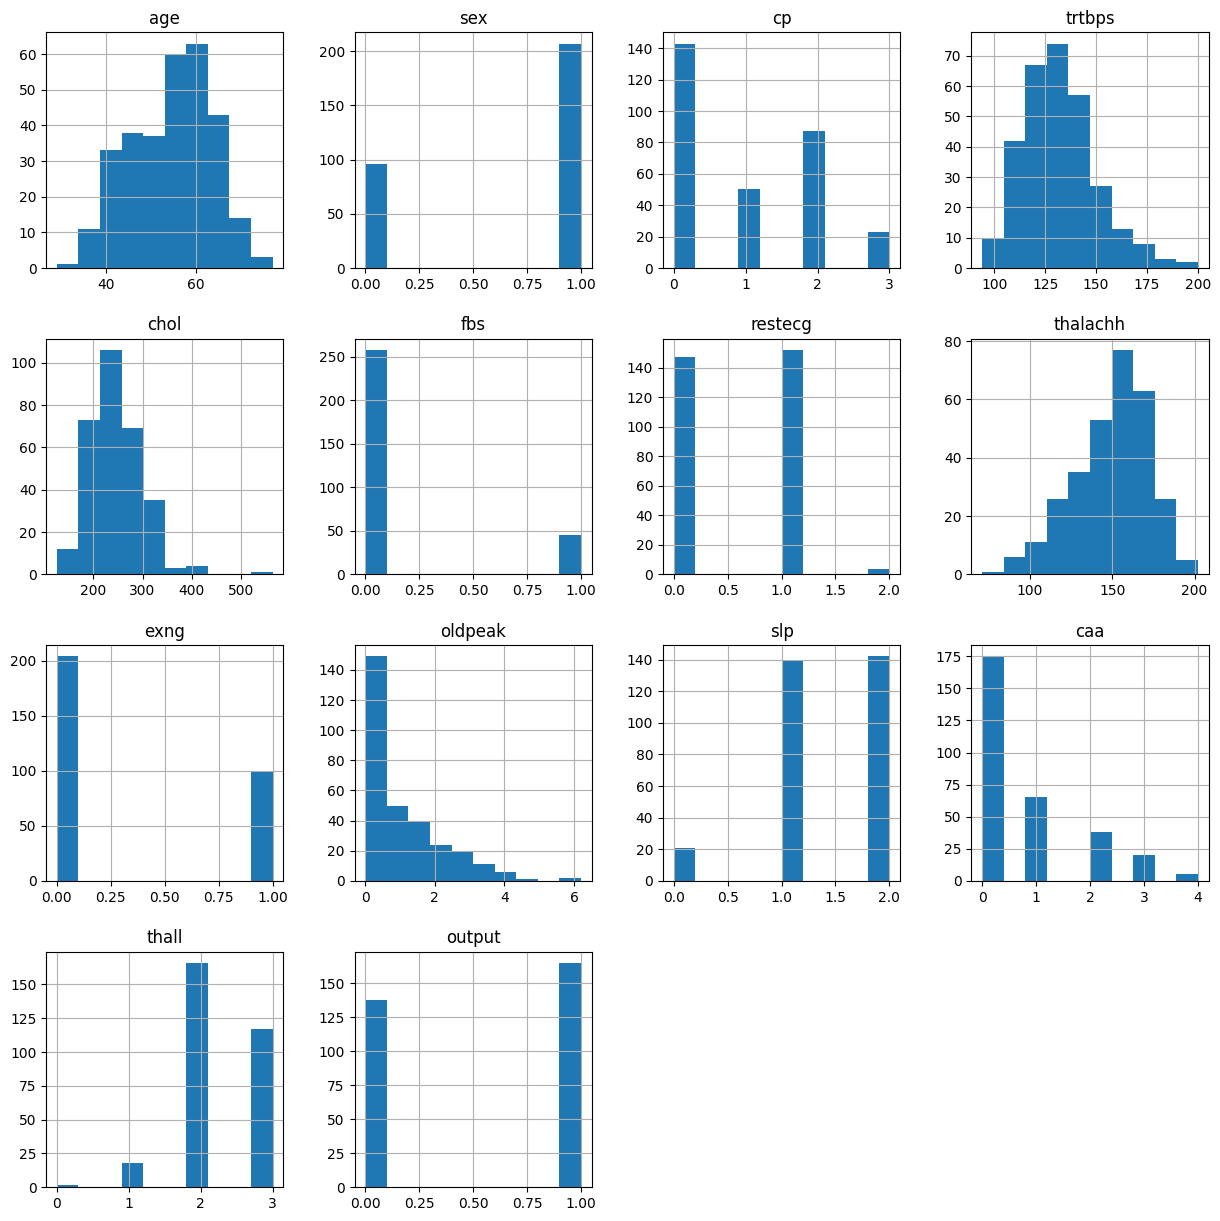

In [31]:
p = heart.hist(figsize=(15, 15))


<Axes: >

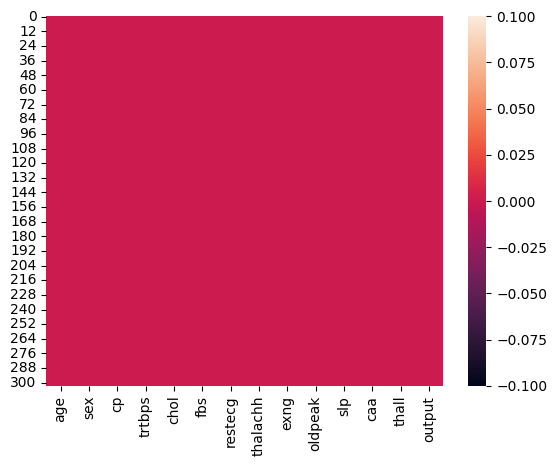

In [32]:
sns.heatmap(heart.isnull())

In [33]:
models = heart.groupby('age').count()[['chol']].sort_values(by='chol',ascending=True).reset_index()
models = models.rename(columns={'chol':'fbs'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '29'),
  Text(1, 0, '34'),
  Text(2, 0, '35'),
  Text(3, 0, '37'),
  Text(4, 0, '38'),
  Text(5, 0, '39'),
  Text(6, 0, '40'),
  Text(7, 0, '41'),
  Text(8, 0, '42'),
  Text(9, 0, '43'),
  Text(10, 0, '44'),
  Text(11, 0, '45'),
  Text(12, 0, '46'),
  Text(13, 0, '47'),
  Text(14, 0, '48'),
  Text(15, 0, '49'),
  Text(16, 0, '50'),
  Text(17, 0, '51'),
  Text(18, 0, '52'),
  Text(19, 0, '53'),
  Text(20, 0, '54'),
  Text(21, 0, '55'),
  Text(22, 0, '56'),
  Text(23, 0, '57'),
  Text(24, 0, '58'),
  Text(25, 0, '59'),
  Text(26, 0, '60'),
  Text(27, 0, '61'),
  Text(28, 0, '62'),
  Text(29, 0, '63'),
  Text(30, 0, '64'),
  Text(31, 0, '65'),
  Text(32, 0, '66'),
  Text(33, 0, '67'),
  Text(34, 0, '68'),
  Text(35, 0, '69'),
  Text(36, 0, '70'),
  Text(37, 0, '71'),
  Text(38, 0, '74'),
 

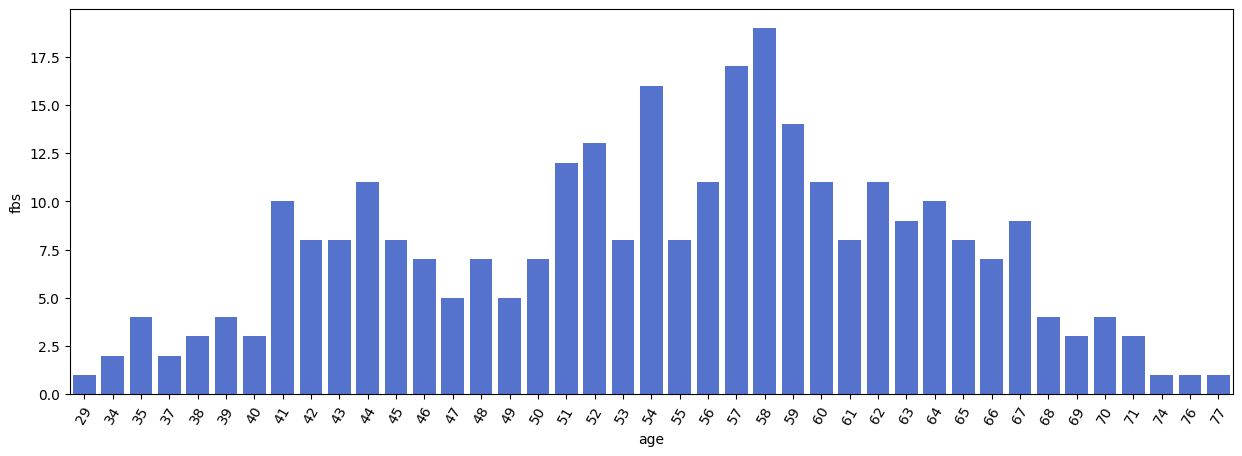

In [34]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['age'], y=models['fbs'],color='royalblue')
plt.xticks(rotation=60)

# Split data

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [36]:
print(X.shape, x_train.shape, x_test.shape)

(303, 13) (242, 13) (61, 13)


# MODELLING DATA

# Membuat model training

In [37]:
model = LogisticRegression()

In [46]:
model.fit(x_train, y_train)

LogisticRegression()

# EVALUATION

# Evaluasi model

In [39]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [40]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.8512396694214877


In [41]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [42]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.819672131147541


# Model Prediksi

In [47]:
input_data = (68, 1, 2, 118, 277, 0, 1, 151, 0, 1, 2, 1, 3)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
predict = model.predict(data_reshaped)
print(predict)

if (predict[0] == 0):
    print('Kemungkinan Kecil Pasien terkena Serangan Jantung')
else:
    print('Kemungkinan Besar Pasien terkena Serangan Jantung')

[1]
Kemungkinan Besar Pasien terkena Serangan Jantung


# DEPLOYMENT

# Save Model

In [44]:
import pickle

filename = 'heart_attack.sav'
pickle.dump(model, open(filename, 'wb'))